**FINAL** **PROJECT :** **PREDICTION OF THE GLOBAL TEMPRATURE.**



# **Importing Data and Preprocessing**

In [ ]:
# import data 
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('/content/temperature_data (1).xlsx')
data.head()

,Year,Total,Gas,Liquids,Solids,Production,Flaring,Capita,Temperature
0,1751,3.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN
1,1752,3.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN
2,1753,3.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN
3,1754,3.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN
4,1755,3.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN


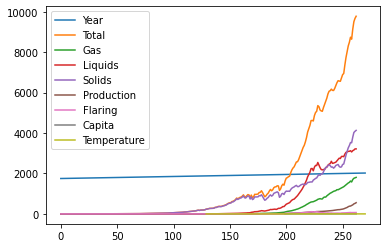

In [ ]:
# Plot the data just to see the overall behaviour
data.plot()
plt.show()

In [ ]:
# Check for the variable types in our dataset
# The entire dataset should contain only numerical data so that we can do regression problem
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         271 non-null    int64  
 1   Total        263 non-null    float64
 2   Gas          263 non-null    float64
 3   Liquids      263 non-null    float64
 4   Solids       263 non-null    float64
 5   Production   263 non-null    float64
 6   Flaring      263 non-null    float64
 7   Capita       64 non-null     float64
 8   Temperature  142 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 19.2 KB


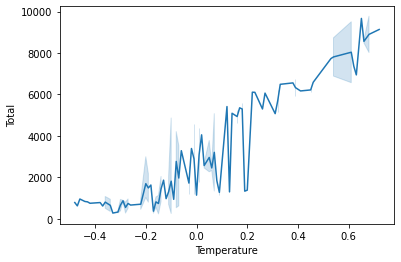

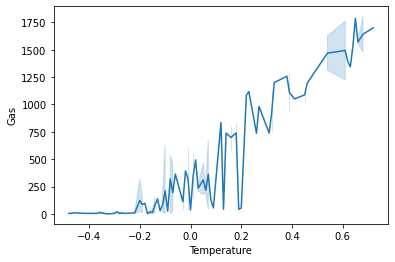

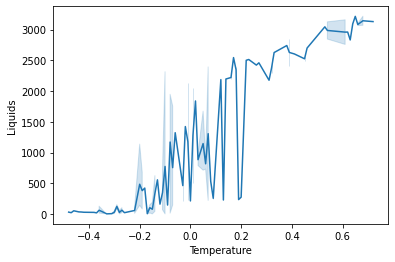

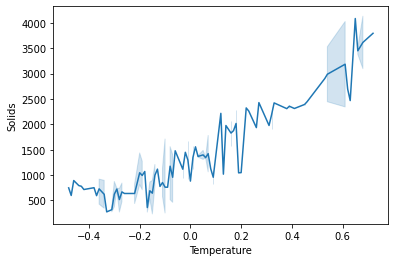

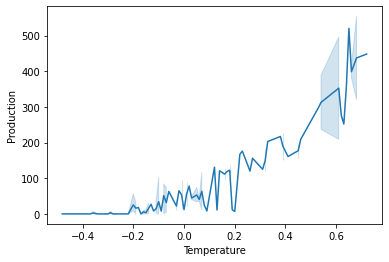

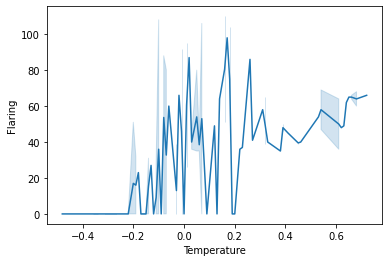

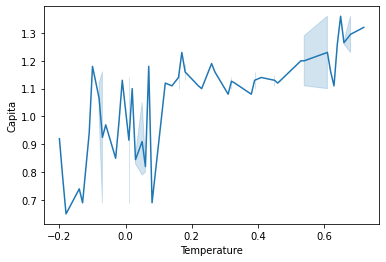

In [ ]:
# Ploting the relationship between each feature and target variable to see the correlation
import seaborn as sns
for i in data.columns[1:-1]:
  sns.lineplot(x="Temperature", y=i, data=data)
  plt.show()

From the above graphs we can say that **Capita** and **Flaring** don't significant affect on the temperature. Thus we can exclude them. This is a feature selection. 


In [ ]:
# Checking for the null values
data.isnull().sum()

Year             0
Total            8
Gas              8
Liquids          8
Solids           8
Production       8
Flaring          8
Capita         207
Temperature    129
dtype: int64

In [ ]:
# in order to understand it better we can look to the proportion of them (NaN values).
data.isnull().sum()/len(data)

Year           0.000000
Total          0.029520
Gas            0.029520
Liquids        0.029520
Solids         0.029520
Production     0.029520
Flaring        0.029520
Capita         0.763838
Temperature    0.476015
dtype: float64

As we see from the correlation graphs and from the Null values proportion **Capita** is the least significant feature. Thus, we willremove it from our dataset.

In [ ]:
# Removind Capita from the dataset
data.drop('Capita', inplace=True, axis=1)

In [ ]:
# Also removing other rows that contain NaN, because we will not be able to use the on the algorithms. 
# This is called droping null values. This is how we deal with missing data.
data = data.dropna(axis=0)

In [ ]:
# Here we again check for the Importance of each feature
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# load the data
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

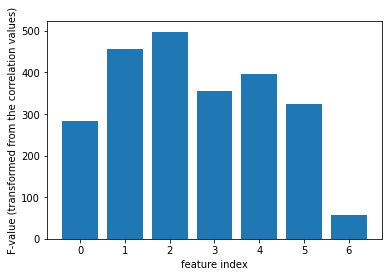

In [ ]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

As we see from the above graph above the 6-th feature which is **Flaring** is the least important, thus we can drop this one as well or work with this. 

In [ ]:
# Checking again for null values, to make sure we don't have any
data.isnull().sum()

Year           0
Total          0
Gas            0
Liquids        0
Solids         0
Production     0
Flaring        0
Temperature    0
dtype: int64

In [ ]:
# Discriptive Statistics for the Data
data.describe()

,Year,Total,Gas,Liquids,Solids,Production,Flaring,Temperature
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,1946.500000,2890.761194,398.268657,1033.455224,1354.089552,78.000000,26.992537,0.004030
std,38.826537,2694.758608,531.877723,1155.425590,910.487744,120.265121,32.562605,0.304508
min,1880.000000,236.000000,0.000000,3.000000,233.000000,0.000000,0.000000,-0.480000
25%,1913.250000,836.500000,8.000000,41.250000,747.750000,0.000000,0.000000,-0.220000
50%,1946.500000,1391.500000,64.000000,307.000000,1045.000000,12.500000,0.000000,-0.075000
75%,1979.750000,5089.250000,733.000000,2278.000000,1899.750000,119.750000,48.750000,0.177500
max,2013.000000,9776.000000,1806.000000,3216.000000,4131.000000,554.000000,110.000000,0.720000


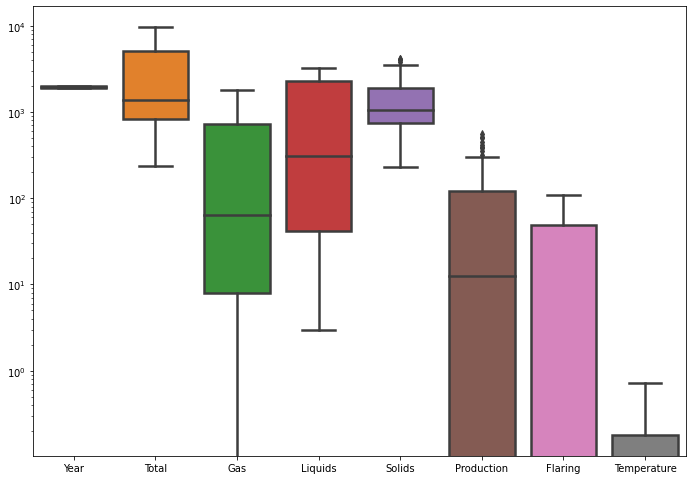

In [ ]:
# Plotting the data to check outliers 
import matplotlib.pyplot as plt
import seaborn as sns
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=data,linewidth=2.5,ax=ax)
g.set_yscale("log")

As we see from the graph there are some outliers inside the **Solid** and **Production** columns. In order to remove them we will do **Quantile-based Flooring and Capping**. In this nethod we will do flooring for small values and Capping for large values.

In [ ]:
# Flooring and Capping for Solids
# First identify
print(data['Solids'].quantile(0.10))
print(data['Solids'].quantile(0.90))

365.7
2439.9


In [ ]:
# Flooring and Capping for Solids
data["Solids"] = np.where(data["Solids"] <365.7, 365.7,data['Solids'])
data["Solids"] = np.where(data["Solids"] >2439.9, 2439.9,data['Solids'])

In [ ]:
# Flooring and capping for Solids
# First identify
print(data['Production'].quantile(0.10))
print(data['Production'].quantile(0.90))

0.0
223.3


In [ ]:
# Flooring and Capping for Solids
data["Production"] = np.where(data["Production"] <0.0, 0.0,data['Production'])
data["Production"] = np.where(data["Production"] >223.3, 223.3,data['Production'])

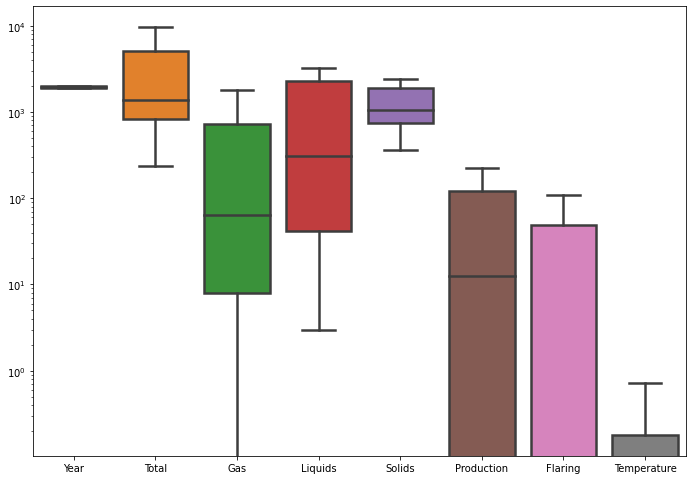

In [ ]:
# If we plot again the outliers are gone. 
import matplotlib.pyplot as plt
import seaborn as sns
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=data,linewidth=2.5,ax=ax)
g.set_yscale("log")

In [ ]:
# split data into training and testing
import numpy as np
np.random.seed(200)

# split the data 80% for training and 20% for testing
msk=np.random.rand(len(data))<0.8
train_df=data[msk]
test_df=data[~msk]


In [ ]:
# Data for training the model
features_train = train_df.loc[:, train_df.columns != "Temperature"]
target_train = train_df.loc[:,'Temperature']

In [ ]:
# Data for (testing )predicting the model
features_test = test_df.loc[:, test_df.columns != "Temperature"]
target_test = test_df.loc[:,'Temperature']

# **Implementing Linear Regression Algorithm**

In [ ]:
# import libraries
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(features_train, target_train)
lr_prediction = lr.predict(features_test)


In [ ]:
# Calculating the errors
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
# MSE
mean_squared_error(target_test, lr_prediction)

0.01094154030142278

In [ ]:
#MAE 
mean_absolute_error(target_test, lr_prediction)

0.08955663934454561

In [ ]:
# RMSE
np.sqrt(mean_squared_error(target_test, lr_prediction))

0.10460181786863353

In [ ]:
#  Check how good id our model
from sklearn.metrics import r2_score
lr_squared = r2_score(target_test, lr_prediction)
lr_squared

0.8732338792556668

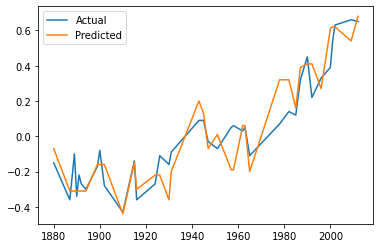

In [ ]:
# plotting the graph of actual and predicted values
plt.plot(features_test['Year'], target_test, label = 'Actual')
plt.plot(features_test['Year'], pd.Series(dt_prediction), label = 'Predicted')
plt.legend()
plt.show()

# **Implementing DecisionTreeRegressor Algorithms**

In [ ]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr = DecisionTreeRegressor()


In [ ]:
# Hyper parameters range intialization for tuning 
from sklearn.model_selection import GridSearchCV
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
gridF = GridSearchCV(regr,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
gridF.fit(features_train, target_train)

In [ ]:
gridF.best_estimator_

In [ ]:
regr = DecisionTreeRegressor(max_features=5)
regr.fit(features_train, target_train)

DecisionTreeRegressor(max_features=5)

In [ ]:
# Predict
dt_prediction = regr.predict(features_test)
print(dt_prediction)

[-0.07 -0.31 -0.17 -0.31 -0.31 -0.31 -0.31 -0.16 -0.16 -0.16 -0.44 -0.15
 -0.3  -0.22 -0.22 -0.36 -0.2   0.2   0.19 -0.07  0.08 -0.19  0.03  0.06
  0.06 -0.2   0.18  0.26  0.31  0.41  0.39  0.41  0.27  0.61  0.62  0.62
  0.64  0.61]


In [ ]:
# MSE
mean_squared_error(target_test, dt_prediction)

0.010542105263157894

In [ ]:
#MAE 
mean_absolute_error(target_test, dt_prediction)

0.08210526315789472

In [ ]:
# RMSE
np.sqrt(mean_squared_error(target_test, dt_prediction))

0.10267475475090211

In [ ]:
# 
dtr_squared = r2_score(target_test, dt_prediction)
dtr_squared

0.8778616399635096

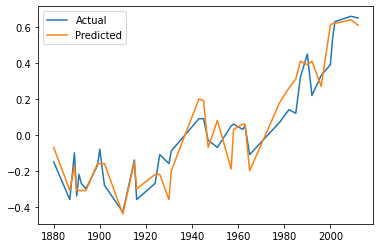

In [ ]:
# plotting the graph of actual and predicted values
plt.plot(features_test['Year'], target_test, label = 'Actual')
plt.plot(features_test['Year'], pd.Series(dt_prediction), label = 'Predicted')
plt.legend()
plt.show()

# **Implementing Support Vector Regression**

In [ ]:
from sklearn.svm import SVR
# Fit regression model
svr = SVR().fit(features_train, target_train)
# Predict
svr_prediction = svr.predict(features_test)

In [ ]:
# MSE
mean_squared_error(target_test, svr_prediction)

0.011726055979128446

In [ ]:
#MAE 
mean_absolute_error(target_test, svr_prediction)

0.09269756112941935

In [ ]:
# RMSE
np.sqrt(mean_squared_error(target_test, svr_prediction))

0.10828691508731997

In [ ]:
svr_squared = r2_score(target_test, svr_prediction)
svr_squared

0.8641446645394419

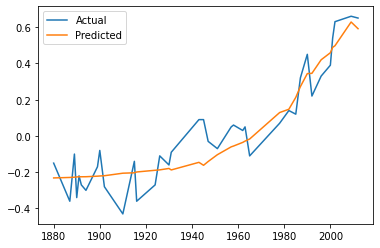

In [ ]:
# plotting the graph of actual and predicted values
plt.plot(features_test['Year'], target_test, label = 'Actual')
plt.plot(features_test['Year'], pd.Series(svr_prediction), label = 'Predicted')
plt.legend()
plt.show()

# **Implementing Random Forest Regressor**

In [ ]:
# implementing random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(features_train, target_train)
rfr_prediction = rfr.predict(features_test)
rfr_prediction

array([-0.19003135, -0.22843164, -0.23046497, -0.23172584, -0.23172584,
       -0.23172584, -0.23172584, -0.24044042, -0.24513689, -0.24816834,
       -0.29932473, -0.29810618, -0.29714527, -0.29600979, -0.29017749,
       -0.27887451, -0.27289265,  0.00999897, -0.00398892, -0.02709771,
       -0.03962792, -0.0445624 , -0.04385655, -0.04385655, -0.04385655,
       -0.04385655,  0.19735486,  0.23900932,  0.23501971,  0.31733017,
        0.33796746,  0.32362092,  0.41697788,  0.52904813,  0.57158412,
        0.5814194 ,  0.63101742,  0.64519917])

In [ ]:
# MSE
mean_squared_error(target_test, rfr_prediction)

0.00952924680783576

In [ ]:
#MAE 
mean_absolute_error(target_test, rfr_prediction)

0.08407457167377183

In [ ]:
# RMSE
np.sqrt(mean_squared_error(target_test, rfr_prediction))

0.09761786111074018

In [ ]:
# How accurate is the model
rfr_squared = r2_score(target_test, rfr_prediction)
rfr_squared

0.889596380567407

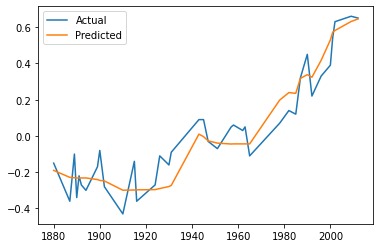

In [ ]:
# plotting the graph of actual and predicted values
plt.plot(features_test['Year'], target_test, label = 'Actual')
plt.plot(features_test['Year'], pd.Series(rfr_prediction), label = 'Predicted')
plt.legend()
plt.show()

# **Implementing LGBMRegressor**

In [ ]:
from pandas.core.common import random_state
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=42)
model.fit(features_train, target_train)
lgb_prediction = model.predict(features_test)


In [ ]:
# MSE
mean_squared_error(target_test, lgb_prediction)

0.013513085713911807

In [ ]:
#MAE 
mean_absolute_error(target_test, lgb_prediction)

0.09926581471667956

In [ ]:
# RMSE
np.sqrt(mean_squared_error(target_test, lgb_prediction))

0.11624579869359497

In [ ]:
lgbr_squared = r2_score(target_test, lgb_prediction)
lgbr_squared

0.8434405569921889

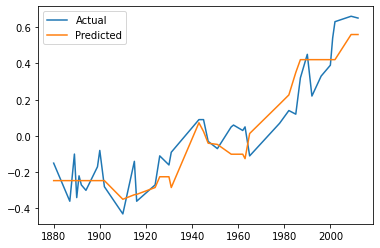

In [ ]:
# plotting the graph of actual and predicted values
plt.plot(features_test['Year'], target_test, label = 'Actual')
plt.plot(features_test['Year'], pd.Series(lgb_prediction), label = 'Predicted')
plt.legend()
plt.show()

# **Implementing XGBoostRegressor**

In [ ]:
import xgboost as xg
model = xg.XGBRegressor()
model.fit(features_train, target_train)

[01:14:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xg_pred = model.predict(features_test)

In [ ]:
# MSE
mean_squared_error(target_test, xg_pred)

0.008195714490516391

In [ ]:
#MAE 
mean_absolute_error(target_test, xg_pred)

0.07808028083098562

In [ ]:
# RMSE
np.sqrt(mean_squared_error(target_test, xg_pred))

0.09053018552127456

In [ ]:
xgbr_squared = r2_score(target_test, xg_pred)
xgbr_squared

0.9050463733560636

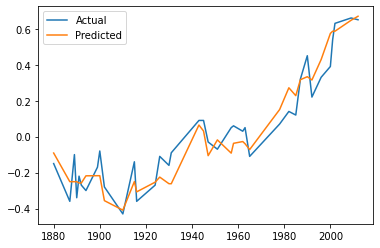

In [ ]:
plt.plot(features_test['Year'], target_test, label = 'Actual')
plt.plot(features_test['Year'], pd.Series(xg_pred), label = 'Predicted')
plt.legend()
plt.show()

# **Choosing the best Algorithm**

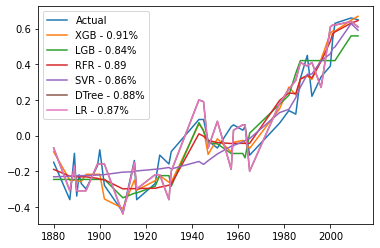

In [ ]:
# Comparison
plt.plot(features_test['Year'], target_test, label = 'Actual')
plt.plot(features_test['Year'], pd.Series(xg_pred), label = f'XGB - {round(xgbr_squared,2)}%')
plt.plot(features_test['Year'], pd.Series(lgb_prediction), label = f'LGB - {round(lgbr_squared,2)}%')
plt.plot(features_test['Year'], pd.Series(rfr_prediction), label = f'RFR - {round(rfr_squared,2)}')
plt.plot(features_test['Year'], pd.Series(svr_prediction), label = f'SVR - {round(svr_squared,2)}%')
plt.plot(features_test['Year'], pd.Series(dt_prediction), label = f'DTree - {round(dtr_squared,2)}%')
plt.plot(features_test['Year'], pd.Series(dt_prediction), label = f'LR - {round(lr_squared,2)}%')
plt.legend()
plt.show()

By looking at this graph we can see that XGBoost is the best choice, becasue it provides, 91% accuracy. In order to check it lets try to predict temperature for 2013.

In [ ]:
# Selecting the last row from our data which represent 2013. 
# Divide it into testing and training part. 
dft = data.tail(1)
dft_x = dft.iloc[:,:-1]
dft_x

,Year,Total,Gas,Liquids,Solids,Production,Flaring
262,2013,9776.0,1806.0,3216.0,2439.9,223.3,68.0


In [ ]:
# Predicting the value using trained model
xgpred = model.predict(dft_x)

In [ ]:
# rounded prediciton up to 2 decimals
round(xgpred[0],2)

0.67

In [ ]:
# The actual result
dft_y = dft.iloc[:,-1]
dft_y

262    0.68
Name: Temperature, dtype: float64

As we see our predicted value is 0.67 and the actual value is 0.68. The are very close to each other, thus we can conclude that our model predicted the result correctly taking into consideration some error. Errors are calculated above in XGB section. 